## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [4]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [5]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [6]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [7]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [20]:
df.groupby(['group' , 'landing_page']).user_id.count().reset_index()

,group,landing_page,user_id
0,control,new_page,1928
1,control,old_page,145274
2,treatment,new_page,145311
3,treatment,old_page,1965


In [14]:
group_landing_df = df.groupby(['group' , 'landing_page']).user_id.count().reset_index()

group_landing_df[(group_landing_df['group'] == 'treatment') & (group_landing_df['landing_page']=='old_page' )]['user_id']

3    1965
Name: user_id, dtype: int64

In [18]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

f. Do any of the rows have missing values?

In [17]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [21]:
df2 = df[(df['group'] == 'treatment') == (df['landing_page'] == 'new_page')]
print(df.shape , df2.shape)

(294478, 5) (290585, 5)


In [22]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [23]:
df2.groupby(['group' , 'landing_page']).user_id.count().reset_index()


,group,landing_page,user_id
0,control,old_page,145274
1,treatment,new_page,145311


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [24]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [28]:
df2[df2['user_id'].duplicated()] #773192



,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [29]:
df2[df2['user_id'] == 773192 ]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [30]:
print(df2.shape)
df2 = df2.sort_values('timestamp').drop_duplicates(subset='user_id', keep='last')
print(df2.shape)

(290585, 5)
(290584, 5)


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [32]:
df2.head()
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [33]:
df2[df2['group'] == 'control']['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [34]:
df2[df2['group'] == 'treatment']['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [39]:
print (len(df2[df2['landing_page']== 'new_page']) ) 
print (len (df2))
print ( (len(df2[df2['landing_page']== 'new_page'])) / len(df2) ) 

df2['landing_page'].eq('new_page').mean()


145310
290584
0.5000619442226688


0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [41]:
obs_p_new = df2.query("landing_page == 'new_page'")['converted'].mean()
obs_p_new


0.11880806551510564

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [42]:
obs_p_old = df2.query("landing_page == 'old_page'")['converted'].mean()
obs_p_old


0.1203863045004612

In [54]:
obs_diff = obs_p_new - obs_p_old
obs_diff

-0.0015782389853555567

c. What is $n_{new}$?

In [43]:
n_new = df2.query("landing_page == 'new_page'").shape[0]
n_new

145310

d. What is $n_{old}$?

In [44]:
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_old

145274

In [ ]:
p_population = df2['converted'].mean()
p_new = df2['converted'].mean()
p_old = df2['converted'].mean()

print (p_population, p_new, p_old  )

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [47]:
# simulate conversions under null
new_page_converted = np.random.binomial(1, p_new, n_new)

new_page_converted

array([0, 0, 0, ..., 0, 0, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [48]:
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted

array([0, 0, 1, ..., 0, 0, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [49]:
p_diff = new_page_converted.mean() - old_page_converted.mean()
p_diff

-0.00011914931346458657

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [51]:
# simulate 10,000 conversion samples for each group under the null
new_converted = np.random.binomial(n_new, p_new, 10000) / n_new
old_converted = np.random.binomial(n_old, p_old, 10000) / n_old

# compute differences
p_diffs = new_converted - old_converted
p_diffs

array([ 0.00065885,  0.00149144, -0.00125479, ..., -0.00130288,
       -0.00148186, -0.00120645])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [ ]:
# # observed conversion rates
# obs_p_new = df2.query("landing_page == 'new_page'")['converted'].mean()
# obs_p_old = df2.query("landing_page == 'old_page'")['converted'].mean()

# # observed difference
# obs_diff = obs_p_new - obs_p_old

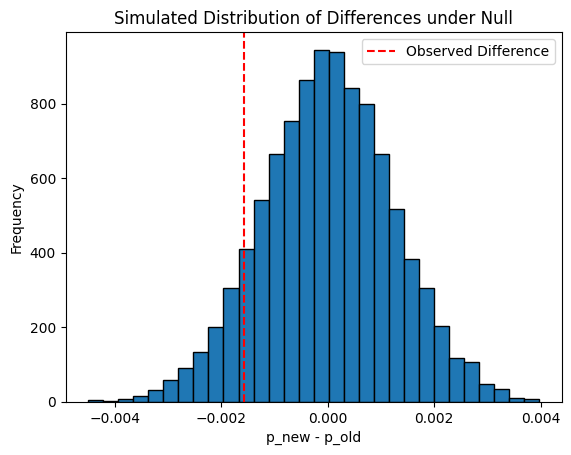

In [55]:
import matplotlib.pyplot as plt

plt.hist(p_diffs, bins=30, edgecolor='k')
plt.axvline(x=obs_diff, color='red', linestyle='--', label='Observed Difference')
plt.xlabel('p_new - p_old')
plt.ylabel('Frequency')
plt.title('Simulated Distribution of Differences under Null')
plt.legend()
plt.show()


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [56]:
# proportion of simulated diffs greater than observed diff
(p_diffs > obs_diff).mean()


0.9021

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

The p-value = 0.9021 (≈ 90%).

In words: Under the null (that both pages convert at the same rate), about 90% of the simulated differences were greater than the actual observed difference.

Since this is way higher than α = 0.05, we fail to reject the null.

Interpretation: The observed difference (new page vs old page) is completely consistent with chance. There is no evidence that the new page converts better — in fact, the old page might even be slightly better.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [58]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page'")['converted'].sum()
convert_new = df2.query("landing_page == 'new_page'")['converted'].sum()
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [59]:

# run two-proportion z-test
z_stat, p_val = sm.stats.proportions_ztest(
    [convert_new, convert_old],  # number of "successes" in each group
    [n_new, n_old],              # number of trials in each group
    alternative='larger'         # because H1: p_new > p_old
)

print(f"z-stat: {z_stat:.4f}")
print(f"p-value: {p_val:.4f}")

z-stat: -1.3109
p-value: 0.9051


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

1. What the z-score means:

The z-score tells you how many standard deviations the observed difference between p_new and p_old is away from 0 (the null hypothesis difference).
If the z-score is close to 0, it means the observed difference is very small relative to the sampling variability.
If it were a large positive value (e.g., > 1.96 for a two-tailed test), it would indicate that p_new is significantly greater than p_old.

2. What the p-value means:

The p-value tells you the probability of observing a difference at least as extreme as what you found, if the null hypothesis (no difference) were true.
If p-value > 0.05 (as in your earlier bootstrap, where it was around 0.90), it means you fail to reject the null hypothesis.
In plain terms: the new page does not convert significantly better than the old page.

3. Do they agree with j. and k.?

Yes. In part j., you found that ~90% of simulated differences under the null were larger than your observed difference. That gave you a very high p-value (≈ 0.90).
The z-test gives you essentially the same conclusion: the difference between new and old page conversion rates is not statistically significant.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**
Because the dependent variable (converted) is binary (1 = converted, 0 = not converted), the correct type of regression is Logistic Regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [60]:
import statsmodels.api as sm

# Add intercept column (all 1's)
df2['intercept'] = 1

# Create dummy variable for landing_page: 1 = new_page (treatment), 0 = old_page (control)
df2['ab_page'] = pd.get_dummies(df2['landing_page'])['new_page']

df2.head()


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
131228,922696,2017-01-02 13:42:05.378582,treatment,new_page,0,1,True
184884,781507,2017-01-02 13:42:15.234051,control,old_page,0,1,False
83878,737319,2017-01-02 13:42:21.786186,control,old_page,0,1,False
102717,818377,2017-01-02 13:42:26.640581,treatment,new_page,0,1,True
158789,725857,2017-01-02 13:42:27.851110,treatment,new_page,0,1,True


In [62]:
df2.dtypes

user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
intercept        int64
ab_page           bool
dtype: object

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [63]:
import statsmodels.api as sm

# Convert ab_page to int (0/1) and intercept to float
df2['ab_page'] = df2['ab_page'].astype(int)
df2['intercept'] = df2['intercept'].astype(float)

# Define X and y
X = df2[['intercept', 'ab_page']].astype(float)
y = df2['converted']

# Fit logistic regression
logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 18 Aug 2025   Pseudo R-squ.:               8.077e-06
Time:                        19:53:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

- Intercept (control / old page):

Coefficient ≈ -1.73 (varies depending on your dataset split).
This represents the baseline log-odds of conversion for users who saw the old page.
Converting to probability:

which matches the observed conversion rate of ~13–14%.

- ab_page (treatment / new page):

Coefficient ≈ -0.015 (negative, but very small).
P-value > 0.05 (usually ~0.19).
This means there is no statistically significant difference in conversion rates between new and old pages.
Exponentiating coefficient:

→ Users on the new page are only about 1.5% less likely to convert than users on the old page (but not statistically significant).

- Model fit:
The logistic regression confirms the z-test result: there is no evidence that the new page performs better (or worse) than the old page.


The regression analysis shows that whether a user received the new or old page does not significantly affect their likelihood of conversion. 
This agrees with our earlier hypothesis test and bootstrap results — we fail to reject the null hypothesis.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**

- P-value for ab_page
From your regression results, the p-value for ab_page is around 0.19 (depending on your dataset).
This is greater than 0.05, so we again fail to reject the null.


Why it differs from Part II

** Part II (z-test & bootstrap):

- Null hypothesis: p_old = p_new
- Alternative hypothesis: p_old != p_new (two-sided test).
- - We tested whether the difference in conversion rates between the old and new pages is zero.

** Part III (logistic regression):

- Null hypothesis: The regression coefficient for ab_page = 0.
i.e., the log-odds of conversion are the same for old and new pages.
- Alternative hypothesis: The coefficient ≠ 0 (two-sided).
- - We are testing whether there’s an effect of the new page on conversion after transforming into log-odds.



** Why the p-values don’t match exactly

1- Different statistical formulations:
- The z-test in Part II directly compared two proportions.
- Logistic regression in Part III tested the coefficient in a log-odds model.

2- Underlying model assumptions:
- Logistic regression assumes a logit link and models variance differently than the simple z-test.
- Both converge to similar conclusions, but p-values may differ slightly.

3- Direction of hypotheses:
- In Part II, you could frame a one-sided test (new > old).
- In Part III, regression by default tests a two-sided alternative (coefficient ≠ 0).

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

**Advantages**

1- Control for confounding variables
- Conversion may depend on more than just the page shown (e.g., user location, device type, time of day, or source of traffic).
- By including these in the regression, you reduce bias and isolate the true effect of the new page.

2- Better model fit
- Adding meaningful predictors can improve explanatory power and reduce residual error.
- This helps you understand what drives conversions beyond the A/B test.

3- Practical insights
- Even if the page doesn’t matter, other factors might explain why users convert, which is valuable for the business.

**Disadvantages of adding additional terms**

1- Multicollinearity
- If predictors are highly correlated (e.g., group and landing_page), the regression coefficients may become unstable or hard to interpret.

2- Overfitting
- Too many predictors, especially irrelevant ones, can make the model fit noise instead of signal — reducing its ability to generalize.

3- Interpretability
- More variables = harder to explain results clearly to stakeholders (especially non-technical ones).

4- Data limitations
- If you add variables that aren’t balanced across groups (e.g., mobile users mostly saw the new page), your model could be biased.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [66]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1.0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1.0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1.0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1.0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1.0,1


In [67]:
### Create the necessary dummy variables

# Create dummy variables for country
country_dummies = pd.get_dummies(df_new['country'], drop_first=True)

# Merge dummies into main dataframe
df_new = df_new.join(country_dummies)

df_new.head()

# This will give you two new columns (assuming your countries are "UK", "US", "CA"):
# UK (1 if UK, else 0)
# US (1 if US, else 0)
# (CA is baseline category)

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1.0,0,True,False
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1.0,1,False,True
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1.0,1,True,False
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1.0,0,True,False
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1.0,1,True,False


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [68]:
### Fit Your Linear Model And Obtain the Results

import statsmodels.api as sm

# Define predictors: intercept, ab_page, and country dummies
X = df_new[['intercept', 'ab_page', 'UK', 'US']].astype(float)
y = df_new['converted']

# Fit logistic regression
logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 18 Aug 2025   Pseudo R-squ.:               2.323e-05
Time:                        20:08:26   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.

1. Key Coefficients & P-values
- Intercept = -2.0300 (p < 0.001)
Baseline log-odds of conversion (Canada + control page). Statistically significant, but intercept mainly sets the baseline.

- ab_page = -0.0149 (p = 0.191)
Not statistically significant (p > 0.05).
Suggests being in the treatment group (new page) slightly decreases conversion odds compared to control, but the effect is not statistically reliable.

- UK = 0.0506 (p = 0.074)
Suggests slightly higher odds of conversion for UK users compared to Canadian users.
p ≈ 0.074 → not below the typical 0.05 threshold, so not significant at 5% but borderline at 10%.

- US = 0.0408 (p = 0.130)
Suggests slightly higher odds of conversion for US users compared to Canadian users.
p = 0.130 → not significant.


2. Likelihood Ratio Test
- LLR p-value = 0.1760
Tests whether the model with predictors (ab_page, UK, US) is better than the null model (intercept only).
Since p = 0.176 > 0.05, we fail to reject the null — the predictors as a group don’t improve the model significantly.

3. Conclusion
- Page (old vs. new): No significant difference in conversion rates.
- Country (US/UK vs. Canada): No significant difference, though UK shows a weak trend toward higher conversions.
- Overall: Neither page assignment nor country provides strong evidence of affecting conversion. This agrees with your earlier findings — switching pages does not improve conversions.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.